<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  15732592 \
Student1 Name: Marko Ivanov

Student2 ID: 15743063 \
Student2 Name: Teodora Stereciu

Student3 ID: 14836459 \
Student3 Name: Ranjan Mishra

Student4 ID: 15494349 \
Student4 Name: Isabelle Kampono

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import json

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

SEED = 1810

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

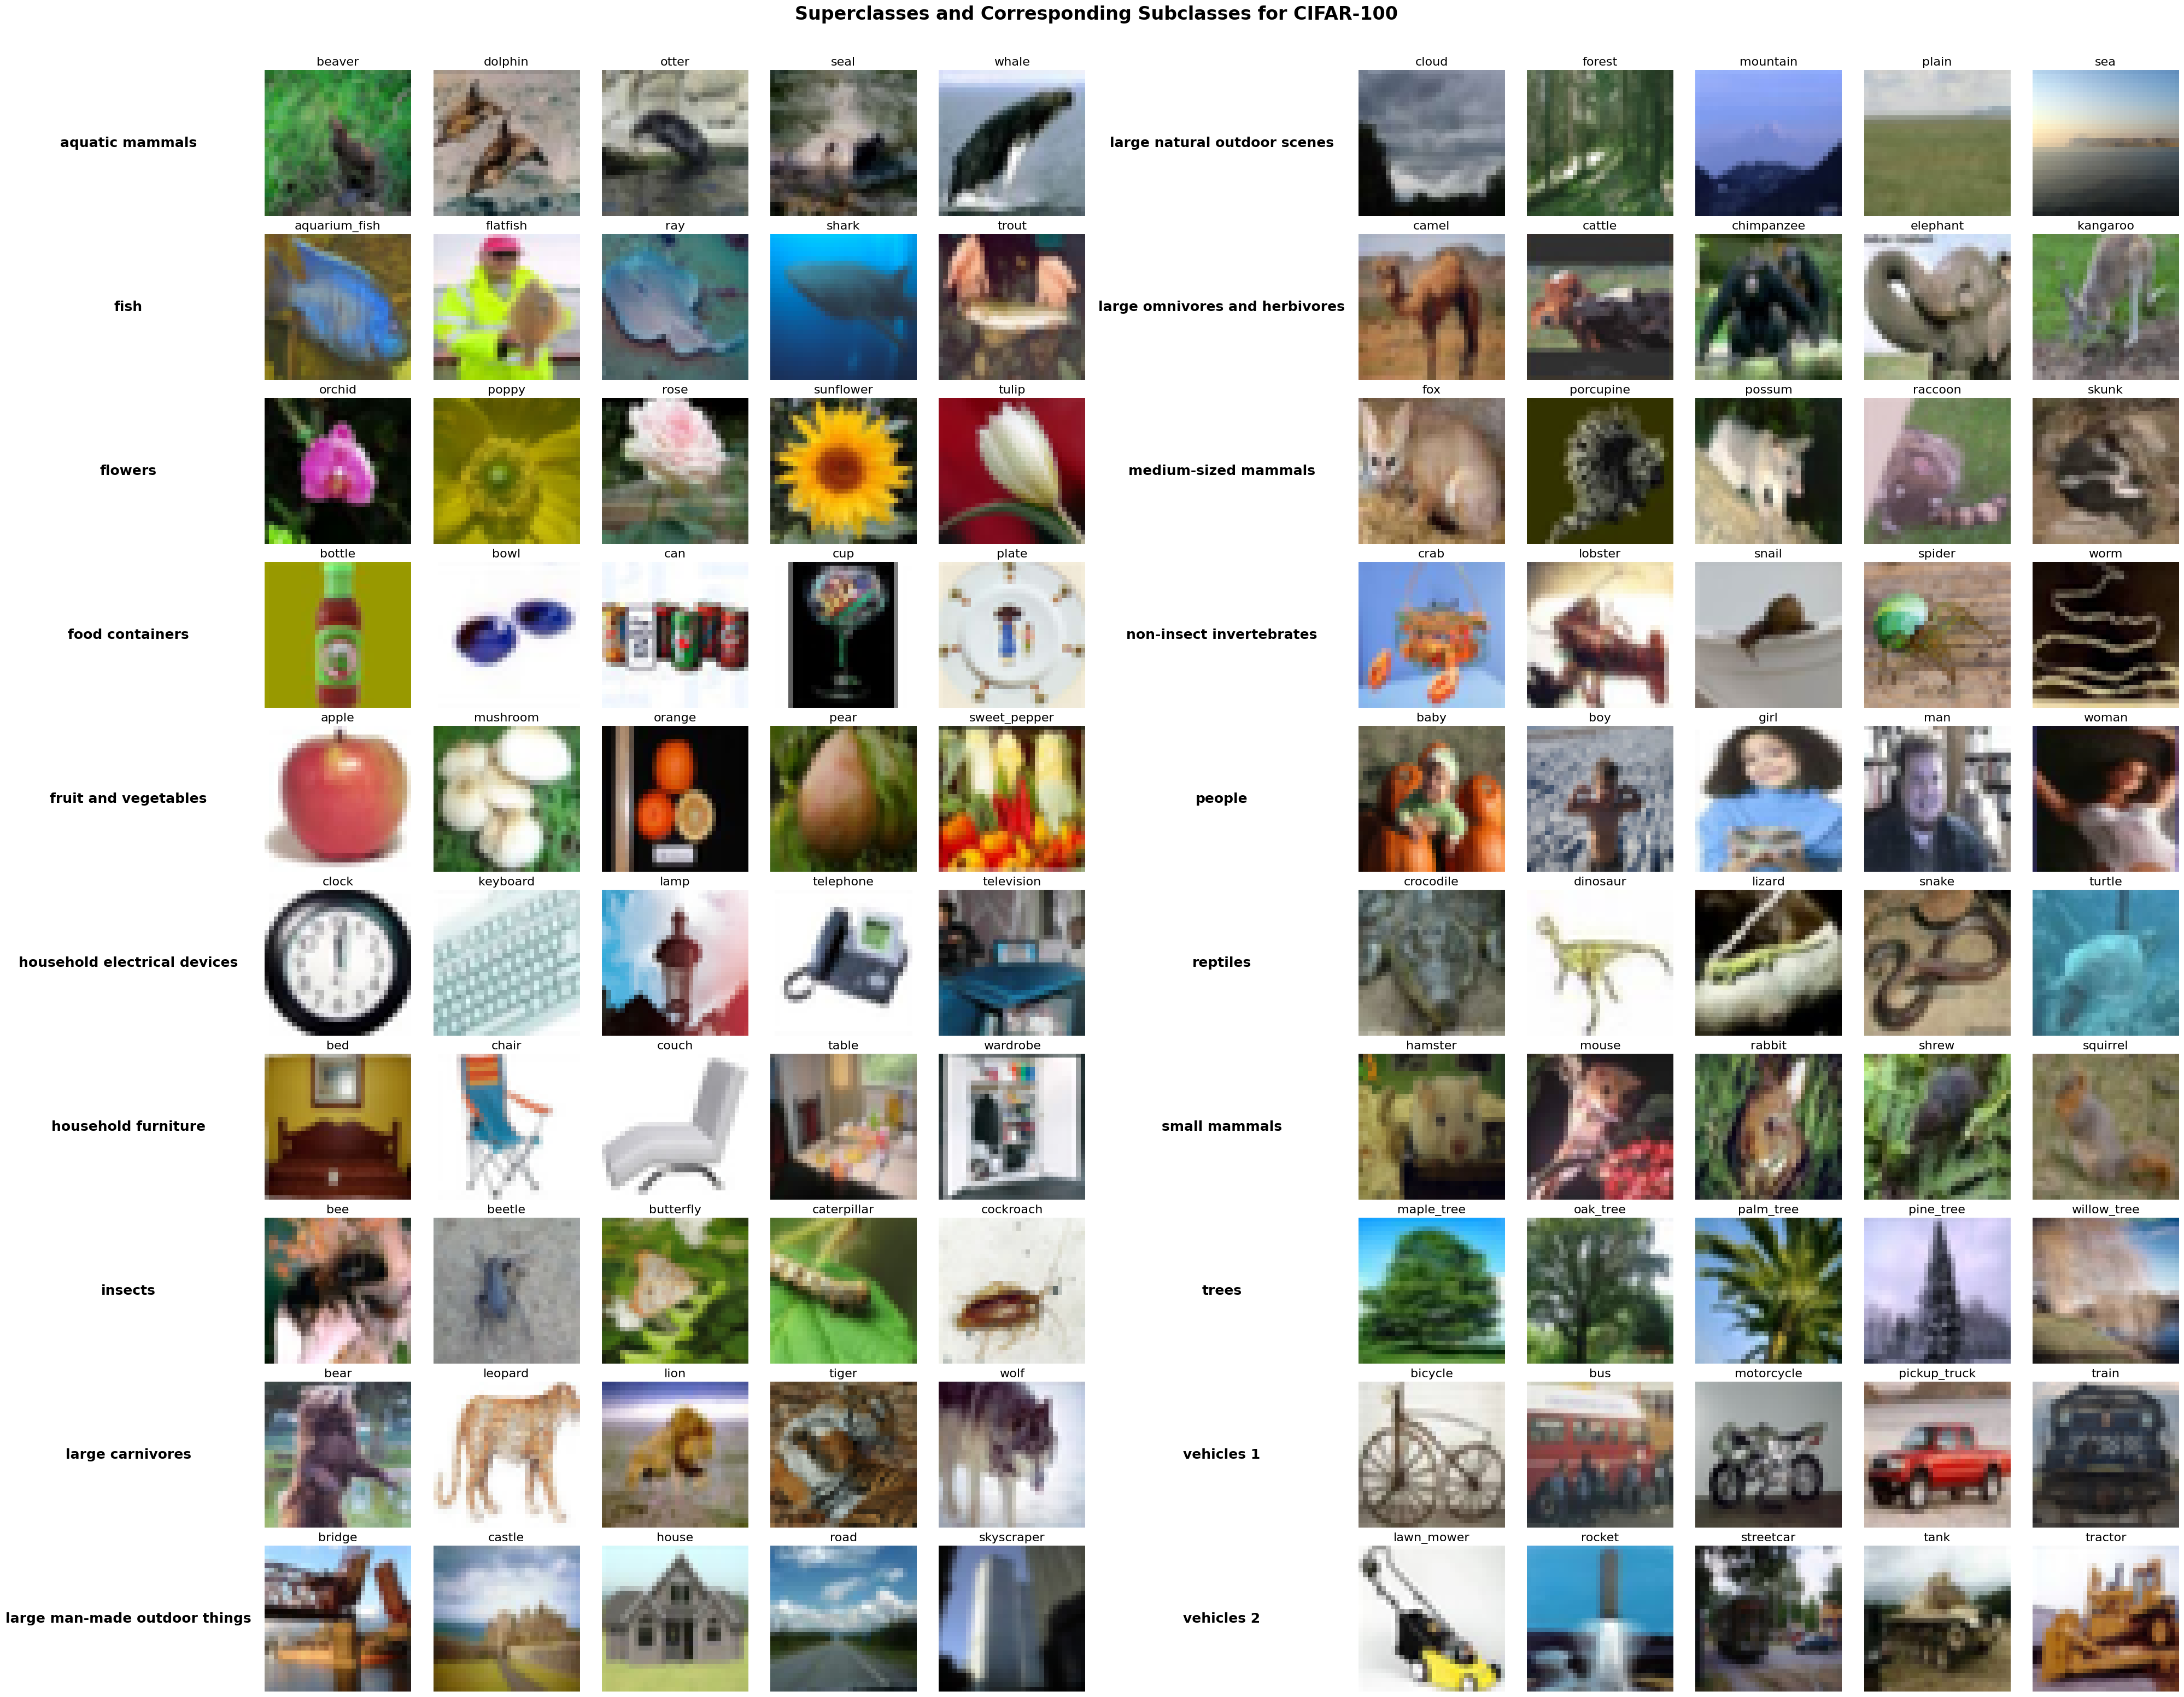

In [2]:
# function to denormalize images for plotting
def denormalize(image):
    image = image / 2 + 0.5  
    np_image = image.numpy()  
    return np.transpose(np_image, (1, 2, 0))  # rearrange dimensions to HWC

# split superclasses into two groups for two columns
def split_superclasses(superclass_dict):
    superclasses_list = list(superclass_dict.items())
    mid = len(superclasses_list) // 2
    return superclasses_list[:mid], superclasses_list[mid:]

# cache to store one preselected image for each subclass
preselected_images = {}

# use a DataLoader without shuffling for reproducibility
fixed_data_loader = DataLoader(train_set, shuffle=False, batch_size=1)

# function to cache one image for each subclass deterministically
def cache_images_for_subclasses():
    for data, target in fixed_data_loader:
        label = target.item()
        if label not in preselected_images:
            preselected_images[label] = data[0]  # store the first image for each subclass
        if len(preselected_images) == len(classes):  # stop when all subclasses have an image cached
            break

# function to cache one image for each subclass
def cache_images_for_subclasses():
    for data, target in train_data_loader:
        for img, label in zip(data, target):
            if label.item() not in preselected_images:
                preselected_images[label.item()] = img
            if len(preselected_images) == len(classes):  # stop when all subclasses have an image
                return

cache_images_for_subclasses()

# function to visualize superclasses and subclasses with images and labels on top
def visualize_cifar100_superclasses_all_subclasses(superclass_to_indices):
    # split superclasses into two columns
    col1_superclasses, col2_superclasses = split_superclasses(superclass_to_indices)

    num_superclasses = len(col1_superclasses) 
    max_subclasses = max([len(indices) for _, indices in superclass_to_indices.items()]) 
    
    fig, axs = plt.subplots(num_superclasses, 2 * max_subclasses + 2, figsize=(40, 3 * num_superclasses), constrained_layout=True)

    fig.suptitle("Superclasses and Corresponding Subclasses for CIFAR-100", fontsize=24, fontweight='bold', y=1.03)

    # helper function to plot one side (column) of superclasses
    def plot_column(superclasses, col_start):
        for i, (superclass, indices) in enumerate(superclasses):
            row = i
            axs[row, col_start].text(0.5, 0.5, superclass, fontsize=18, fontweight='bold', ha='center', va='center')
            axs[row, col_start].axis('off') 
            count = 0
            for subclass_idx in indices:
                img = preselected_images[subclass_idx] 
                axs[row, col_start + count + 1].imshow(denormalize(img))
                axs[row, col_start + count + 1].set_title(classes[subclass_idx], fontsize=16) 
                axs[row, col_start + count + 1].axis('off')
                count += 1

    # plot left column
    plot_column(col1_superclasses, 0)
    
    # plot right column
    plot_column(col2_superclasses, max_subclasses + 1)
    
    plt.savefig("cifar100_visualization.png", dpi=300) 
    plt.show()

# display cifar100 images and save the figure
visualize_cifar100_superclasses_all_subclasses(superclass_to_indices)


<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):
    '''
    Class for an MLP classifier with two dense layers.
    '''
    
    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNet, self).__init__()

        self.dense1 = nn.Linear(input_size, hidden_size)
        self.dense2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        flat_x = torch.flatten(x, start_dim=1)
        
        hidden = self.dense1(flat_x)
        hidden = F.relu(hidden)
        hidden = self.dense2(hidden)

        output = F.log_softmax(hidden, dim=1)

        return output


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [5]:
class ConvNet(nn.Module):
    '''
    Class for a CNN image classifier inspired by LeNet-5 and adapted for RGB.
    '''

    def __init__(self, in_channels=3, num_classes=100):
        '''	
        Initializes the convolutional neural network model.

        Args:
            in_channels (int): The number of input channels in the image.
            num_classes (int): The number of classes available.
        '''
        
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 6, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 120, kernel_size=5),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(120 * 1 * 1, 84),
            nn.Tanh(),
            nn.Linear(84, num_classes),
        )
        

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # extract features
        x = self.features(x)
        x = torch.flatten(x, 1)
        
        # make classification
        logits = self.classifier(x)
        probas = F.log_softmax(logits, dim=1)
        return probas


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [6]:
class CIFAR100_loader(Dataset):
    '''
    Class to load CIFAR-100 data.
    '''
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        self.root = root
        self.train = train
        self.transform = transform
        
        # load the CIFAR-100 dataset from torchvision
        self.dataset = torchvision.datasets.CIFAR100(root=self.root, train=self.train, 
                                                     transform=self.transform, download=download)


    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        return len(self.dataset)


    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        img, label = self.dataset[idx] 
        
        # apply transformation (if any)
        if self.transform:
            img = self.transform(img)
        
        return img, label 


In [7]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    transform = transforms.Compose([
        transforms.ToTensor(),  # convert the image to a PyTorch tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize to [-1, 1] range
    ])

    return transform

In [8]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return optimizer

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [9]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy


In [14]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        class_acc (dict): The test accuracies per class.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    class_acc = {}
    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        class_acc[class_name] = accuracy
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

    return class_acc

In [11]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # set net to train mode
    net.train()
    net.to(device)

    # training loop
    for epoch in range(epochs):
        running_loss = 0.0

        # iterate over batches of training data
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # print epoch summary
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

    print('Finished Training')

First, initialize the datasets and data loaders for both models.

In [12]:
# create basic transform to normalize the images
transform = create_transforms()

# load CIFAR-100 dataset
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# create train and test DataLoaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# set input and output dimensions
input_size = 3 * 32 * 32
num_classes = 100

# initialize MLP
hidden_size = 512
mlp = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# initialize CNN
convnet = ConvNet(in_channels=3, num_classes=num_classes)

Files already downloaded and verified
Files already downloaded and verified


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [15]:
loss = nn.CrossEntropyLoss()
optimizer = create_optimizer(mlp, learning_rate=0.001)

train(mlp, train_loader, loss, optimizer, epochs=10)
overall_acc = validate(mlp, test_loader)
class_acc = validate_per_class(mlp, test_loader, classes)

# save model
torch.save(mlp.state_dict(), 'models/twolayernet.pth')

results = {
    "overall_accuracy": overall_acc,
    "per_class_accuracies": class_acc
}

# save results to json
with open('results/twolayernet_results.json', 'w') as f:
    json.dump(results, f, indent=4)

Epoch [1/10], Loss: 3.8161
Epoch [2/10], Loss: 3.4119
Epoch [3/10], Loss: 3.2052
Epoch [4/10], Loss: 3.0287
Epoch [5/10], Loss: 2.8771
Epoch [6/10], Loss: 2.7205
Epoch [7/10], Loss: 2.5722
Epoch [8/10], Loss: 2.4602
Epoch [9/10], Loss: 2.3010
Epoch [10/10], Loss: 2.1850
Finished Training
Accuracy of the network on the test images: 23.49 %
Accuracy of apple : 34.00 %
Accuracy of aquarium_fish : 39.00 %
Accuracy of baby  : 6.00 %
Accuracy of bear  : 4.00 %
Accuracy of beaver : 7.00 %
Accuracy of bed   : 17.00 %
Accuracy of bee   : 8.00 %
Accuracy of beetle : 20.00 %
Accuracy of bicycle : 18.00 %
Accuracy of bottle : 32.00 %
Accuracy of bowl  : 15.00 %
Accuracy of boy   : 13.00 %
Accuracy of bridge : 18.00 %
Accuracy of bus   : 13.00 %
Accuracy of butterfly : 22.00 %
Accuracy of camel : 19.00 %
Accuracy of can   : 27.00 %
Accuracy of castle : 57.00 %
Accuracy of caterpillar : 34.00 %
Accuracy of cattle : 9.00 %
Accuracy of chair : 46.00 %
Accuracy of chimpanzee : 62.00 %
Accuracy of clock

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [16]:
loss = nn.CrossEntropyLoss()
optimizer = create_optimizer(convnet, learning_rate=0.001)

train(convnet, train_loader, loss, optimizer, epochs=10)

overall_acc = validate(convnet, test_loader)
class_acc = validate_per_class(convnet, test_loader, classes)

# save model
torch.save(mlp.state_dict(), 'models/basic_convnet.pth')

results = {
    "overall_accuracy": overall_acc,
    "per_class_accuracies": class_acc
}

# save results to json
with open('results/basic_convnet_results.json', 'w') as f:
    json.dump(results, f, indent=4)

Epoch [1/10], Loss: 3.8966
Epoch [2/10], Loss: 3.4341
Epoch [3/10], Loss: 3.1848
Epoch [4/10], Loss: 3.0117
Epoch [5/10], Loss: 2.8763
Epoch [6/10], Loss: 2.7694
Epoch [7/10], Loss: 2.6806
Epoch [8/10], Loss: 2.6017
Epoch [9/10], Loss: 2.5337
Epoch [10/10], Loss: 2.4716
Finished Training
Accuracy of the network on the test images: 30.38 %
Accuracy of apple : 59.00 %
Accuracy of aquarium_fish : 32.00 %
Accuracy of baby  : 14.00 %
Accuracy of bear  : 10.00 %
Accuracy of beaver : 13.00 %
Accuracy of bed   : 29.00 %
Accuracy of bee   : 23.00 %
Accuracy of beetle : 33.00 %
Accuracy of bicycle : 36.00 %
Accuracy of bottle : 46.00 %
Accuracy of bowl  : 15.00 %
Accuracy of boy   : 10.00 %
Accuracy of bridge : 29.00 %
Accuracy of bus   : 21.00 %
Accuracy of butterfly : 19.00 %
Accuracy of camel : 13.00 %
Accuracy of can   : 29.00 %
Accuracy of castle : 49.00 %
Accuracy of caterpillar : 20.00 %
Accuracy of cattle : 16.00 %
Accuracy of chair : 53.00 %
Accuracy of chimpanzee : 40.00 %
Accuracy of 

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [35]:
def create_transforms_with_data_augmentation():
    '''
    Creates the data transformations for the CIFAR-100 dataset.
    Includes data augmentation for the training set.
    
    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    
    return transform_train, transform_test


class FourLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        '''
        Initializes the two-layer neural network model.
        Added extra hidden layers for enhanced capacity.

        Args:
            input_size (int): The size of the input features.
            hidden_size1 (int): The size of the first hidden layer.
            hidden_size2 (int): The size of the second hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(FourLayerNet, self).__init__()
        
        self.dense1 = nn.Linear(input_size, hidden_size1)
        self.dense2 = nn.Linear(hidden_size1, hidden_size2)
        self.dense3 = nn.Linear(hidden_size2, hidden_size2 // 2)
        self.dense4 = nn.Linear(hidden_size2 // 2, num_classes)

    def forward(self, x):
        flat_x = torch.flatten(x, start_dim=1)
        hidden = F.relu(self.dense1(flat_x))
        hidden = F.relu(self.dense2(hidden))
        hidden = F.relu(self.dense3(hidden))
        output = F.log_softmax(self.dense4(hidden), dim=1)

        return output


class DeeperConvNet(nn.Module):

    def __init__(self, in_channels=3, num_classes=100):
        '''	
        Initializes the convolutional neural network model.
        Added extra convolutional layers for deeper feature extraction.

        Args:
            in_channels (int): Number of input channels (3 for RGB).
            num_classes (int): Number of output classes.
        '''
        
        super().__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 6 * in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6 * in_channels, 16 * in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16 * in_channels, 32 * in_channels, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(32 * in_channels, 64 * in_channels, kernel_size=3),
            nn.ReLU(),
        )

        self.classifier = nn.Sequential(
            nn.Linear(64 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.log_softmax(logits, dim=1)
        return probas
    

def objective(trial):
    # hyperparameters to tune
    learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])
    weight_decay = trial.suggest_uniform('weight_decay', 0, 0.001)
    hidden_size = trial.suggest_int('hidden_size', 100, 500)

    model = TwoLayerNet(input_size=3*32*32, hidden_size=hidden_size, num_classes=100) 
    model.to(device)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)

    # fixed number of epochs
    train(model, train_loader, criterion, optimizer, epochs=10)

    # validate and return accuracy
    accuracy = validate(model, test_loader)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1) 

# best hyperparameters
print(f"Best trial: {study.best_trial.params}")

ModuleNotFoundError: No module named 'optuna'

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [17]:
# YOUR CODE HERE

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [18]:
# YOUR CODE HERE

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [25]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

In [26]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [27]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [21]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [22]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -